# Program JCDSOL-016 - Capstone Project Modul 2
- **Nama Peserta : Edward Fajar Binsar Halomoan Hutapea**
- **Dataset yang dipilih : Supermarket Customers**

**Latar belakang :**
- Sebuah supermarket memiliki data pelanggan serta *business problem* yang dihadapi dan *goals* yang ingin dicapai.
- Sebagai *data analyst*, kita diminta untuk menjawab *business problem* tersebut dan menjelaskan *actionable recommendation* untuk mencapai *goals* tersebut kepada *Board of Director*  

**Audience :** Board of Director (sebagai pengambilan keputusan bisnis)

**Business Problem :**
1. Churn Rate
    - Loyalitas pelanggan terhadap produk supermarket merupakan persoalan yang dihadapi supermarket dari waktu ke waktu.
    - Kehadiran kompetitor beserta variasi produk yang dijualnya membuat pelanggan memiliki banyak opsi dalam mendapatkan produk yang dibutuhkan.
2.  Nilai transaksi yang stagnant
    - Hal ini bisa terkait dengan churn rate, atau promo produk dan discount yang kurang selektif dan kurang tepat sasaran. 

**Goals :**
1. Churn Rate menurun
2. Nilai transaksi meningkat

**Business Question :**
1. Berapa Customer Churn rate?
2. Seberapa efektif discount mempengaruhi tingkat pembelian?
3. Mana kampanye promosi yang paling efektif (memiliki jumlah transaksi tertinggi) dan paling tidak efektif (memiliki jumlah transaksi terendah) ?
4. Produk apa yang memiliki nilai transaksi tertinggi dan terendah dalam 2 tahun terakhir?
5. Metode/Media Transaksi apa yang paling banyak dan paling sedikit dipilih customer untuk melakukan transaksi?
6. Berapa jumlah pelanggan untuk masing-masing kategori usia? Berapa usia pelanggan dengan jumlah pelanggan tertinggi dan terendah?
7. Berapa median income untuk masing-masing kategori usia pelanggan? Berapa usia pelanggan dengan median income tertinggi dan terendah?
8. Berapa usia customer yang memiliki jumlah transaksi tertinggi dan terendah dalam 2 tahun terakhir?
9. Berapa usia customer yang memiliki nilai transaksi (total amount spent) tertinggi dan terendah dalam 2 tahun terakhir?
10. Untuk masing-masing produk, berapa usia customer yang memiliki nilai transaksi tertinggi dan terendah dalam 2 tahun terakhir?
11. Untuk masing-masing lokasi transaksi, berapa usia customer yang memiliki total pembelian tertinggi dan terendah?
12. Untuk kategori pendidikan dan status pernikahan,  berapa distribusi nilai transaksi untuk semua produk?

**Data :**
- Untuk menjawab pertanyaan di atas, kita akan menganalisa data pelanggan supermarket yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK). 

# Berikut ini daftar isi pengerjaan capstone project modul 2:
1. Import Package
2. Import Data
3. Data Wrangling
4. Analisa Data dan Insight untuk setiap Business Questions
5. Actionable Recommendation untuk setiap Business Problem dan Goals 

## 1. Import Package

In [296]:
!pip install dateparser


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [297]:
import numpy as np
import pandas as pd
import dateparser
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [298]:
df = pd.read_csv('Supermarket Customers.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


- Untuk step selanjutnya, kita hanya menampilkan kolom yang dibutuhkan dalam analisa saja. Kolom yang tidak digunakan dalam analisa, akan kita drop.
- Berikut ini adalah kolom yang dibutuhkan dalam analisa:
 

**People**
- ID: ID masing-masing pelanggan
- Year_Birth: Tahun kelahiran pelanggan
- Education: Latar pendidikan pelanggan
- Marital_Status : Status pernikahan pelanggan
- Income: Pendapatan tahunan pelanggan
- Dt_Customer: Tanggal registrasi pelanggan
- Recency: Jumlah hari setelah transaksi terakhir yang dilakukan pelanggan

**Products**
- MntWines: Nilai transaksi pembelian produk WINE dalam 2 tahun terakhir
- MntFruits: Nilai transaksi pembelian produk FRUITS dalam 2 tahun terakhir
- MntMeatProducts: Nilai transaksi pembelian produk MEAT dalam 2 tahun terakhir
- MntFishProducts: Nilai transaksi pembelian produk FISH dalam 2 tahun terakhir
- MntSweetProducts: Nilai transaksi pembelian produk SWEET dalam 2 tahun terakhir
- MntGoldProds: Nilai transaksi pembelian produk GOLD dalam 2 tahun terakhir

**Place**
- NumWebPurchases: Jumlah transaksi online melalui webiste supermarket
- NumCatalogPurchases: Jumlah transaksi menggunakan katalog
- NumStorePurchases: Jumlah transaksi offline langsung di supermarket

**Promotion**
- NumDealsPurchases: Jumlah transaksi yang dibuat dengan harga diskon
- AcceptedCmp1: 1 jika pelanggan menerima promosi di kampanye ke-1, 0 jika tidak menerima.
- AcceptedCmp2: 1 jika pelanggan menerima promosi di kampanye ke-2, 0 jika tidak menerima.
- AcceptedCmp3: 1 jika pelanggan menerima promosi di kampanye ke-3, 0 jika tidak menerima.
- AcceptedCmp4: 1 jika pelanggan menerima promosi di kampanye ke-4, 0 jika tidak menerima.
- AcceptedCmp5: 1 jika pelanggan menerima promosi di kampanye ke-5, 0 jika tidak menerima.
- Response: 1 jika pelanggan menerima promosi di kampanye terakhir, 0 jika tidak menerima.

In [299]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [300]:
df = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

In [301]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,5524,1957,Graduation,Single,58138.0,4/9/2012,58,635,88,546,...,3,8,10,4,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,8/3/2014,38,11,1,6,...,2,1,1,2,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,21/8/2013,26,426,49,127,...,1,8,2,10,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,10/2/2014,26,11,4,20,...,2,2,0,4,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,19/1/2014,94,173,43,118,...,5,5,3,6,0,0,0,0,0,0


Membuat Index dari Kolom Primary Key (yaitu kolom ID)

In [302]:
df = df.set_index('ID')
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,4/9/2012,58,635,88,546,172,...,3,8,10,4,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,8/3/2014,38,11,1,6,2,...,2,1,1,2,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,21/8/2013,26,426,49,127,111,...,1,8,2,10,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,10/2/2014,26,11,4,20,10,...,2,2,0,4,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,19/1/2014,94,173,43,118,46,...,5,5,3,6,0,0,0,0,0,0


In [303]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response'],
      dtype='object')

## 3. Data Wrangling

### 3.1. Pengecekan Tipe Data

In [304]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
AcceptedCmp1             int64
AcceptedCmp2             int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
Response                 int64
dtype: object

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Dt_Customer          2240 non-null   object 
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   int

### 3.2. Pengecekan Anomali Data

#### 3.2.1. Pengecekan Missing Value

In [306]:
dataDesc = []
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(df[i].isna().sum() / len(df) * 100, 2)
    ])

In [307]:
pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null Val",
    "Null Percentage"
])

,Data Features,Data Types,Null Val,Null Percentage
0,Year_Birth,int64,0,0.00
1,Education,object,0,0.00
2,Marital_Status,object,0,0.00
3,Income,float64,24,1.07
4,Dt_Customer,object,0,0.00
5,Recency,int64,0,0.00
6,MntWines,int64,0,0.00
7,MntFruits,int64,0,0.00
8,MntMeatProducts,int64,0,0.00
9,MntFishProducts,int64,0,0.00


**Hasil Pengecekan Missing Value :**
- Dari tabel di atas, hanya kolom income yang memiliki missing value, dengan persentase missing value sebesar 1.07%. Nilai persentase ini termasuk kecil (<3%) sehingga baris dengan missing value di kolom income bisa dihapus (drop).
- Step selanjutnya ==> Drop baris dengan missing value di kolom income

In [308]:
df.dropna(inplace=True) 

In [309]:
df.shape

(2216, 22)

In [310]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
dtype: int64

In [311]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
dtype: int64

**Penghapusan Missing Value sudah dilakukan. Sekarang tidak ada lagi Missing Value**

#### 3.2.2. Pengecekan Data Duplikat

In [312]:
print(df.duplicated().sum())

182


In [313]:
df[df.duplicated()]

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
ID,,,,,,,,,,,,,,,,,,,,,
4119,1963,Master,Together,38620.0,11/5/2013,56,112,17,44,34,...,1,2,5,3,0,0,0,0,0,0
6935,1951,2n Cycle,Married,78497.0,1/12/2013,44,207,26,447,75,...,1,5,7,12,1,0,0,0,0,0
10144,1976,Graduation,Together,51369.0,25/10/2012,84,297,7,79,0,...,2,8,2,4,0,0,0,0,0,0
8652,1946,Graduation,Together,37760.0,31/8/2012,20,84,5,38,150,...,2,4,1,6,0,0,0,0,0,0
933,1978,PhD,Married,37717.0,23/11/2012,31,9,0,6,4,...,1,1,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,1978,Graduation,Together,22775.0,19/6/2013,40,5,1,8,0,...,1,1,0,2,0,0,0,0,0,0
7366,1982,Master,Single,75777.0,4/7/2013,12,712,26,538,69,...,1,3,6,11,0,0,0,1,1,1
4749,1968,Graduation,Together,58554.0,26/9/2012,55,368,24,68,38,...,6,8,2,6,0,0,0,0,0,0


**Hasil Pengecekan Data Duplikat :**
- Terdapat 186 baris yang memiliki data duplikat. Tabel di bawah ini menunjukkan data yang duplikat.
- Step selanjutnya ==> Menghapus semua data duplikat.

In [314]:
df.drop_duplicates(inplace=True) 

In [315]:
df.shape

(2034, 22)

In [316]:
print(df.duplicated().sum())

0


**Penghapusan Data Duplikat sudah dilakukan. Sekarang tidak ada lagi Data Duplikat**

#### 3.2.3. Pengecekan Outliers

In [317]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
AcceptedCmp1             int64
AcceptedCmp2             int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
Response                 int64
dtype: object

In [318]:
def Cek_Outliers(df, col):
    Q1 = df[col].describe()['25%']
    Q3 = df[col].describe()['75%']
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)
    df_outliers = df[(df[col] < Lower_Fence) | (df[col] > Upper_Fence)]
    if len(df_outliers) == 0:
        return "No Outliers"
    else:
        return df_outliers

data_outliers = []
for col in df.columns:
    if df[col].dtypes != 'O':
        data_outliers.append([
            col,
            df[col].dtypes,
            len(Cek_Outliers(df, col)),
            round(len(Cek_Outliers(df, col)) / len(df) * 100, 2)
        ])

pd.DataFrame(data_outliers, columns=[
    "Data Features",
    "Data Types",
    "Outliers Val",
    "Outliers Percentage"
])

,Data Features,Data Types,Outliers Val,Outliers Percentage
0,Year_Birth,int64,3,0.15
1,Income,float64,8,0.39
2,Recency,int64,11,0.54
3,MntWines,int64,33,1.62
4,MntFruits,int64,222,10.91
5,MntMeatProducts,int64,172,8.46
6,MntFishProducts,int64,202,9.93
7,MntSweetProducts,int64,223,10.96
8,MntGoldProds,int64,185,9.10
9,NumDealsPurchases,int64,76,3.74


**Hasil Pengecekan Outliers :**
- Terdapat beberapa kolom yang memiliki outliers, tapi fokus kita kepada kolom-kolom yang berkaitan dengan analisa data.
- Untuk kolom AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 dan Response ==> Hanya memiliki 2 data unik yaitu ) dan 1, sehingga data outliers bisa diabaikan.	
- Step selanjutnya ==> Melakukan DROP outliers terhadap beberapa kolom dengan persentase outliers yang kecil (<3%) untuk menjaga kualitas data.

**DROP Outliers :**
- Jumlah maximum dari keseluruhan data outliers yang di DROP yaitu 3% dari keseluruhan dataset, supaya dataset tidak habis. Jumlah dataset (sebelum DROP outliers) = 2030 baris. Jumlah minimum dataset (sesudah DROP Outliers, maximum 3% data) = 1970 baris. 
- Drop outliers dilakukan pada kolom-kolom yang menjadi analisa.
- Proses Drop outliers dilakukan mulai dari persentase paling kecil yaitu:
    - Prioritas ke 1 : Data Kolom Year_Birth (0.15%),
    - Prioritas ke 2 : Data Kolom NumWebPurchases (0.15%),
    - Prioritas ke 3 : Data Kolom NumCatalogPurchases (1.08%),
    - Prioritas ke 4 : Data Kolom MntWines (1.58%).
- Scatter Plot di bawah ini memperlihatkan keberadaan data outliers di ke-4 kolom di atas    

In [319]:
## Menghitung jumlah minimum dataset (sesudah DROP Outliers) : 

(100 - 3) * len(df) / 100

1972.98

3.2.3.A. Berikut ini adalah **Scatter Plot** yang memperlihatkan keberadaan data outliers di kolom **Year_Birth**

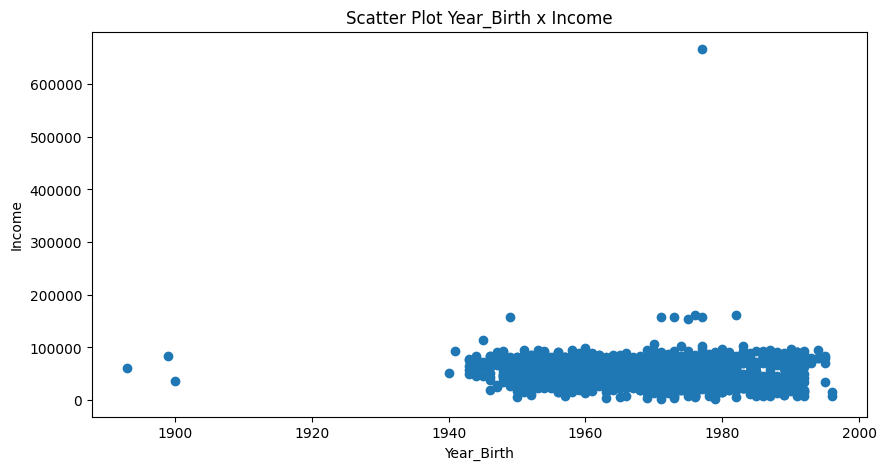

In [320]:
plt.figure(figsize=(10,5))
plt.scatter(df['Year_Birth'], df['Income'])
plt.title('Scatter Plot Year_Birth x Income')
plt.xlabel('Year_Birth')
plt.ylabel('Income')
plt.savefig('Scatter Plot Year_Birth x Income.png')
plt.show()

3.2.3.B. Berikut ini adalah **Scatter Plot** yang memperlihatkan keberadaan data outliers di kolom **NumWebPurchases**

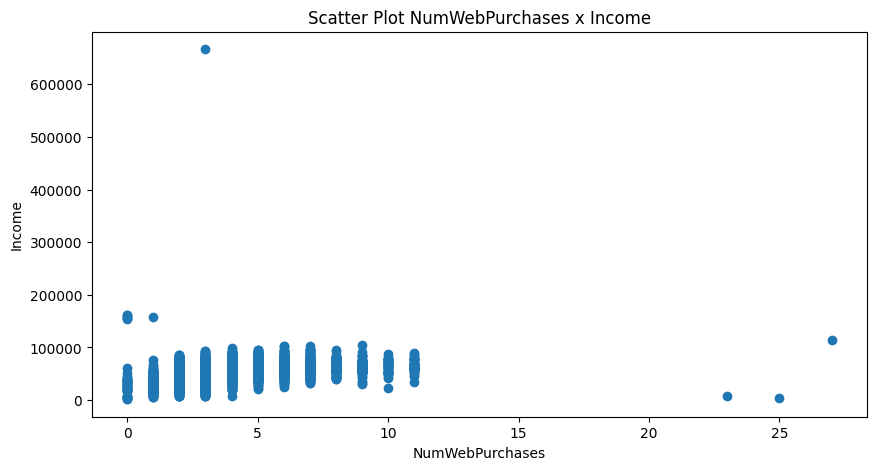

In [321]:
plt.figure(figsize=(10,5))
plt.scatter(df['NumWebPurchases'], df['Income'])
plt.title('Scatter Plot NumWebPurchases x Income')
plt.xlabel('NumWebPurchases')
plt.ylabel('Income')
plt.savefig('Scatter Plot NumWebPurchases x Income.png')
plt.show()

3.2.3.C. Berikut ini adalah **Scatter Plot** yang memperlihatkan keberadaan data outliers di kolom **NumCatalogPurchases**

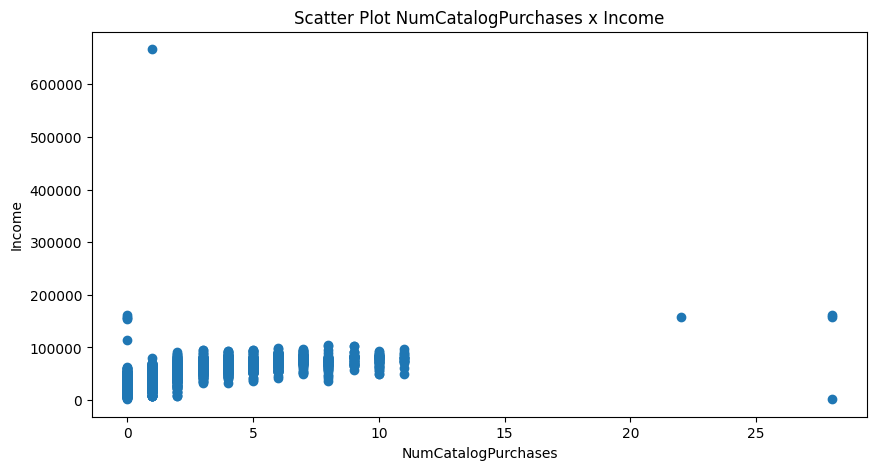

In [322]:
plt.figure(figsize=(10,5))
plt.scatter(df['NumCatalogPurchases'], df['Income'])
plt.title('Scatter Plot NumCatalogPurchases x Income')
plt.xlabel('NumCatalogPurchases')
plt.ylabel('Income')
plt.savefig('Scatter Plot NumCatalogPurchases x Income.png')
plt.show()

3.2.3.D. Berikut ini adalah **Scatter Plot** yang memperlihatkan keberadaan data outliers di kolom **MntWines**

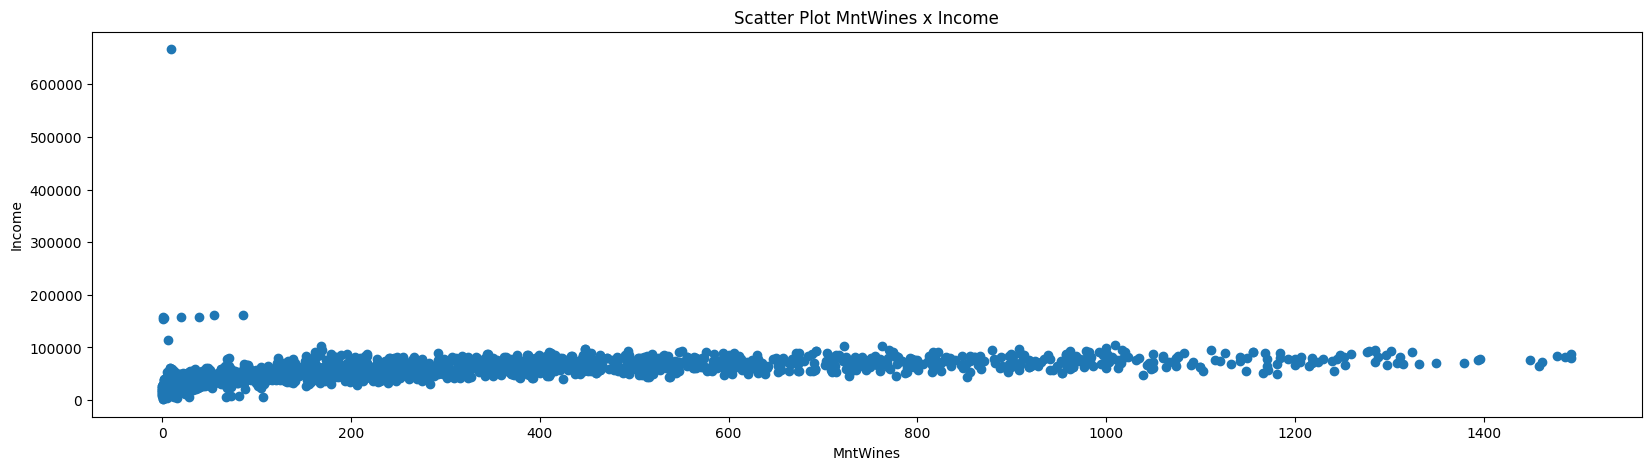

In [323]:
plt.figure(figsize=(20,5))
plt.scatter(df['MntWines'], df['Income'])
plt.title('Scatter Plot MntWines x Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.savefig('Scatter Plot MntWines x Income.png')
plt.show()

Melakukan DROP outliers di kolom Year_Birth, NumWebPurchases, NumCatalogPurchases dan MntWines:

In [324]:
df = df[~df['Year_Birth'].isin(Cek_Outliers(df, 'Year_Birth')['Year_Birth'])] ## data Kolom Year_Birth yang bukan outliers.
df = df[~df['NumWebPurchases'].isin(Cek_Outliers(df, 'NumWebPurchases')['NumWebPurchases'])] ## data Kolom NumWebPurchases yang bukan outliers.
df = df[~df['NumCatalogPurchases'].isin(Cek_Outliers(df, 'NumCatalogPurchases')['NumCatalogPurchases'])] ## data Kolom NumCatalogPurchases yang bukan outliers.
df = df[~df['MntWines'].isin(Cek_Outliers(df, 'MntWines')['MntWines'])] ## data Kolom MntWines yang bukan outliers.
df.shape

(1973, 22)

**Proses DROP Outliers di kolom Year_Birth, NumWebPurchases, NumCatalogPurchases dan MntWines sudah dilakukan**

#### Pengecekan Hasil setelah DROP Outliers 

In [325]:
data_outliers = []
for col in df.columns:
    if df[col].dtypes != 'O':
        data_outliers.append([
            col,
            df[col].dtypes,
            len(Cek_Outliers(df, col)),
            round(len(Cek_Outliers(df, col)) / len(df) * 100, 2)
        ])

pd.DataFrame(data_outliers, columns=[
    "Data Features",
    "Data Types",
    "Outliers Val",
    "Outliers Percentage"
])

,Data Features,Data Types,Outliers Val,Outliers Percentage
0,Year_Birth,int64,11,0.56
1,Income,float64,5,0.25
2,Recency,int64,11,0.56
3,MntWines,int64,12,0.61
4,MntFruits,int64,213,10.80
5,MntMeatProducts,int64,175,8.87
6,MntFishProducts,int64,210,10.64
7,MntSweetProducts,int64,224,11.35
8,MntGoldProds,int64,181,9.17
9,NumDealsPurchases,int64,72,3.65


### 3.3. Pengecekan Kolom Bertipe Tanggal

In [326]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,4/9/2012,58,635,88,546,172,...,3,8,10,4,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,8/3/2014,38,11,1,6,2,...,2,1,1,2,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,21/8/2013,26,426,49,127,111,...,1,8,2,10,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,10/2/2014,26,11,4,20,10,...,2,2,0,4,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,19/1/2014,94,173,43,118,46,...,5,5,3,6,0,0,0,0,0,0


In [327]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
AcceptedCmp1             int64
AcceptedCmp2             int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
Response                 int64
dtype: object

**Kolom bertipe tanggal yaitu Kolom Dt_Customer masih bertipe object, sehingga perlu dikonversi menjadi tipe datetime64[ns]**

#### Konversi Kolom Bertipe Tanggal

In [328]:
df['Dt_Customer'] = df['Dt_Customer'].apply(dateparser.parse)
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,2012-04-09,58,635,88,546,172,...,3,8,10,4,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,2014-08-03,38,11,1,6,2,...,2,1,1,2,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,...,1,8,2,10,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,2014-10-02,26,11,4,20,10,...,2,2,0,4,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,...,5,5,3,6,0,0,0,0,0,0


In [329]:
df.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
Response                        int64
dtype: object

### 3.4. Deskriptif Data Statistik untuk data numerik dan object

In [330]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Year_Birth,1973.0,NaN,NaN,NaN,1969.02889,1940.0,1960.0,1970.0,1977.0,1996.0,11.594907
Education,1973,5,Graduation,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,1973,8,Married,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,1973.0,NaN,NaN,NaN,51554.62595,1730.0,34961.0,50729.0,67087.0,666666.0,25059.252713
Dt_Customer,1973,NaN,NaN,NaN,2013-07-13 11:25:19.918905344,2012-01-08 00:00:00,2013-01-20 00:00:00,2013-07-14 00:00:00,2014-01-03 00:00:00,2014-12-06 00:00:00,NaN
Recency,1973.0,NaN,NaN,NaN,48.831728,0.0,24.0,49.0,74.0,99.0,28.944184
MntWines,1973.0,NaN,NaN,NaN,286.004562,0.0,23.0,167.0,483.0,1218.0,311.237717
MntFruits,1973.0,NaN,NaN,NaN,25.873796,0.0,1.0,8.0,32.0,199.0,39.365657
MntMeatProducts,1973.0,NaN,NaN,NaN,158.215915,0.0,15.0,64.0,215.0,984.0,212.383694
MntFishProducts,1973.0,NaN,NaN,NaN,37.100862,0.0,3.0,12.0,49.0,259.0,54.922603


### 3.5. Data Summary ==> Setelah Drop Missing Value, Hapus Duplicate Data, Drop Outliers dan Konversi Kolom Bertipe Tanggal

In [331]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,2012-04-09,58,635,88,546,172,...,3,8,10,4,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,2014-08-03,38,11,1,6,2,...,2,1,1,2,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,...,1,8,2,10,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,2014-10-02,26,11,4,20,10,...,2,2,0,4,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,...,5,5,3,6,0,0,0,0,0,0


#### 3.5.1. Tipe Data, Missing Value dan Data Unik

In [332]:
dataDesc = []
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(df[i].isna().sum() / len(df) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(1).values
    ])

pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null Val",
    "Null Percentage",
    "Jumlah Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null Val,Null Percentage,Jumlah Unique,Unique Sample
0,Year_Birth,int64,0,0.0,55,[1958]
1,Education,object,0,0.0,5,[2n Cycle]
2,Marital_Status,object,0,0.0,8,[Together]
3,Income,float64,0,0.0,1913,[63404.0]
4,Dt_Customer,datetime64[ns],0,0.0,659,[2014-04-06T00:00:00.000000000]
5,Recency,int64,0,0.0,100,[91]
6,MntWines,int64,0,0.0,740,[219]
7,MntFruits,int64,0,0.0,158,[60]
8,MntMeatProducts,int64,0,0.0,529,[561]
9,MntFishProducts,int64,0,0.0,179,[97]


#### 3.5.2. Data Outliers

In [333]:
data_outliers = []
for col in df.columns:
    if df[col].dtypes != 'O':
        data_outliers.append([
            col,
            df[col].dtypes,
            len(Cek_Outliers(df, col)),
            round(len(Cek_Outliers(df, col)) / len(df) * 100, 2)
        ])

pd.DataFrame(data_outliers, columns=[
    "Data Features",
    "Data Types",
    "Outliers Val",
    "Outliers Percentage"
])

,Data Features,Data Types,Outliers Val,Outliers Percentage
0,Year_Birth,int64,11,0.56
1,Income,float64,5,0.25
2,Dt_Customer,datetime64[ns],11,0.56
3,Recency,int64,11,0.56
4,MntWines,int64,12,0.61
5,MntFruits,int64,213,10.80
6,MntMeatProducts,int64,175,8.87
7,MntFishProducts,int64,210,10.64
8,MntSweetProducts,int64,224,11.35
9,MntGoldProds,int64,181,9.17


**Kita keep data outliers, maka untuk analisa kita menggunakan median (bukan mean)**

## 4. Analisa Data dan Insight untuk setiap Business Questions

### Penambahan kolom baru untuk analisa data
1. Kolom 'Purchases_Amount' = nilai transaksi untuk semua pembelian produk
2. Kolom 'Purchases_Quantity' = jumlah transaksi untuk semua media/lokasi transaksi (online melalui website supermarket, menggunakan katalog dan offline langsung di supermarket)
3. Kolom 'Purchases_without_discount' = jumlah transaksi yang tanpa diskon
4. Kolom 'Amount_per_Purchase' = rata-rata nilai transaksi untuk setiap transaksi
5. Kolom 'Age' = usia pelanggan di tahun 2015. Dataset tidak menunjukkan kapan transaksi terjadi. Tapi Kolom 'Dt_Customer' menunjukkan enrolment pelanggan mulai 8-Januari-2012 s/d 6-Desember-2014. Untuk analisa data, kita menggunakan tahun 2015 sebagai dasar penentuan usia pelanggan. Tahun 2015 adalah tahun terdekat dengan enrolment pelanggan terakhir.
6. Kolom 'Range_of_Age' = kategori usia pelanggan. Kita membagi usia pelanggan dalam beberapa kategori, dengan rentang 5 tahun.
7. Kolom 'Customer_Churn' = klasifikasi pelanggan antara pelanggan tidak loyal (churn) dan pelanggan loyal (non-churn)

In [334]:
df['Purchases_Amount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Purchases_Quantity'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Purchases_without_discount'] = df['Purchases_Quantity'] - df['NumDealsPurchases']
df['Amount_per_Purchase'] = (df['Purchases_Amount'] / df['Purchases_Quantity']).round(2)

In [335]:
df['Age'] = 2015 - df['Year_Birth']

def Rentang_Usia(x):
    if x <= 20:
        return "16-20"
    if 20 < x <= 25:
        return "21-25"
    if 25 < x <= 30:
        return "26-30"
    if 30 < x <= 35:
        return "31-35"
    if 35 < x <= 40:
        return "36-40"
    if 40 < x <= 45:
        return "41-45"
    if 45 < x <= 50:
        return "46-50"
    if 50 < x <= 55:
        return "51-55"
    if 55 < x <= 60:
        return "56-60"
    if 60 < x <= 65:
        return "61-65"
    if 65 < x <= 70:
        return "66-70"
    else:
        return ">70"

df['Range_of_Age'] = df['Age'].apply(Rentang_Usia)

In [336]:
def last_purchase(x):
    if x <= 30:
        return "Not Churn"
    else:
        return "Churn"

df['Customer_Churn'] = df['Recency'].apply(last_purchase)

In [337]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,Response,Purchases_Amount,Purchases_Quantity,Purchases_without_discount,Amount_per_Purchase,Age,Range_of_Age,Customer_Churn
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,2012-04-09,58,635,88,546,172,...,0,0,1,1617,22,19,73.50,58,56-60,Churn
2174,1954,Graduation,Single,46344.0,2014-08-03,38,11,1,6,2,...,0,0,0,27,4,2,6.75,61,61-65,Churn
4141,1965,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,776,20,19,38.80,50,46-50,Not Churn
6182,1984,Graduation,Together,26646.0,2014-10-02,26,11,4,20,10,...,0,0,0,53,6,4,8.83,31,31-35,Not Churn
5324,1981,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,422,14,9,30.14,34,31-35,Churn


### 4.1. Business Question 1 : Berapa Customer Churn rate?

**CHURN (Customer Lost)**
- Customer Churn akan merugikan supermarket karena menunjukkan supermarket tidak bisa mempertahankan pelanggan tapi telah kehilangan pelanggan.
- Alasannya:
    - Lebih sedikit pelanggan berarti revenue yang lebih kecil
    - Pelanggan yang tidak puas tidak akan merekomendasikan supermarket kita
    - Mendapatkan pelanggan baru lebih mahal dari mempertahankan pelanggan saat ini (sekitar 5-25x lebih mahal). Mempertahankan pelanggan lebih hemat biaya.

**Penghitungan Churn Rate**
- Pada umumnya di bisnis supermarket, Churn dihitung ketika pelanggan tidak melakukan transaksi selama lebih dari 1 bulan.
- kolom recency menunjukkan data "jumlah hari setelah transaksi terakhir yang dilakukan setiap pelanggan", dengan rentang 0-99 hari.
- Dengan menggunakan data recency, kita menentukan jumlah churn (jumlah hari <= 30 hari) dan non-churn (jumlah hari > 30 hari).
- Churn rate dihitung dengan cara membandingkan jumlah churn terhadap jumlah pelanggan yang terdaftar di supermarket.
- jumlah pelanggan yang terdaftar ditunjukkan dengan kolom Dt_Customer (==> Date of customer's enrollment with the company), yaitu sebanyak 1973 pelanggan.
- Churn rate tahunan yang dapat diterima setiap tahunnya adalah 5-7% (atau churn rate bulanan <1%) ==> source : https://www.forbes.com/advisor/business/churn-rate/

Tabel 1 Jumlah pelanggan loyal (Non-Churn) dan pelanggan tidak loyal (Churn) :

In [338]:
pd.crosstab(index=df['Customer_Churn'], columns='Jumlah Pelanggan', margins=True, margins_name = 'Total').drop('Total', axis=1)

col_0,Jumlah Pelanggan
Customer_Churn,
Churn,1334
Not Churn,639
Total,1973


Tabel 2 Pesentase jumlah pelanggan loyal (Non-Churn) dan pelanggan tidak loyal (Churn) :

In [339]:
(pd.crosstab(index=df['Customer_Churn'], columns='Persentase Jumlah Pelanggan (%)', normalize='all') * 100).round(2)

col_0,Persentase Jumlah Pelanggan (%)
Customer_Churn,
Churn,67.61
Not Churn,32.39


Tabel 3 Jumlah pelanggan loyal (Non-Churn) dan pelanggan tidak loyal (Churn) untuk setiap kategori usia :

In [340]:
pd.crosstab(index=df['Range_of_Age'], columns=df['Customer_Churn'], margins=True, margins_name = 'Total')

Customer_Churn,Churn,Not Churn,Total
Range_of_Age,,,
16-20,4,2,6
21-25,27,20,47
26-30,94,45,139
31-35,121,62,183
36-40,221,98,319
41-45,223,120,343
46-50,180,77,257
51-55,124,64,188
56-60,156,66,222


Tabel 4 Median income antara pelanggan loyal (Non-Churn) dan pelanggan tidak loyal (Churn) :

In [341]:
df.groupby(['Customer_Churn'])[['Income']].median().round(2)

,Income
Customer_Churn,
Churn,50733.0
Not Churn,50520.0


Tabel 5 median nilai transaksi antara pelanggan loyal (Non-Churn) dan pelanggan tidak loyal (Churn) :

In [342]:
df.groupby(['Customer_Churn'])[['Purchases_Amount', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median().round(2)

,Purchases_Amount,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Customer_Churn,,,,,,,
Churn,358.0,167.0,8.0,64.5,11.0,8.0,24.0
Not Churn,373.0,172.0,7.0,61.0,12.0,8.0,24.0


Tabel 6 Jumlah nilai transaksi antara pelanggan loyal (Non-Churn) dan pelanggan tidak loyal (Churn) :

In [343]:
df.groupby(['Customer_Churn'])[['Purchases_Amount', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

,Purchases_Amount,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Customer_Churn,,,,,,,
Churn,770723,381887,34127,211286,49750,36440,57233
Not Churn,366991,182400,16922,100874,23450,16091,27254


Tabel 7 Jumlah transaksi antara pelanggan loyal (Non-Churn) dan pelanggan tidak loyal (Churn) :

In [344]:
df.groupby(['Customer_Churn'])[['Purchases_Quantity', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().round(2)

,Purchases_Quantity,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Customer_Churn,,,,
Churn,16381,5372,3343,7666
Not Churn,7913,2606,1592,3715


**Insight - informasi :**
- Tabel 2 di atas menunjukkan jumlah customer lost (pelanggan tidak loyal) sebanyak 67.61% ==> Churn rate bulanan = 67.61% (>1%).
- Tabel 3 di atas menunjukkan pelanggan tidak loyal paling banyak berusia 36-45 tahun.
- Tabel 4 di atas menunjukkan median income antara pelanggan loyal dan pelanggan tidak loyal relatif sama.
- Tabel 5 di atas menunjukkan median nilai transaksi (amount spent) dalam 2 tahun terakhir antara pelanggan loyal dan pelanggan tidak loyal hanya berbeda sedikit.
- Tabel 6 di atas menunjukkan jumlah nilai transaksi (total amount spent) pelanggan tidak loyal dalam 2 tahun terakhir sekitar 2x lipat dari pelanggan loyal.
- Tabel 7 di atas menunjukkan jumlah transaksi pelanggan tidak loyal sekitar 2x lipat dari pelanggan loyal.

**Kondisi di atas menunjukkan bahwa supermarket kita mengalami kehilangan potensi keuntungan yang besar akibat hilangnya pelanggan.** 

### 4.2. Business Question 2 : Seberapa efektif discount mempengaruhi tingkat pembelian?

In [345]:
data_discount = []
for col in df.columns[[22,10,21]]:
    if df[col].dtypes == 'int64':
        data_discount.append([
            col,
            df[col].sum(),
            (df[col].sum() / df['Purchases_Quantity'].sum() * 100).round(2)
        ])

pd.DataFrame(data_discount, columns=[
    "Data Features",
    "Jumlah Transaksi",
    "Persentase (%)"
])

,Data Features,Jumlah Transaksi,Persentase (%)
0,Purchases_Amount,1137714,4683.11
1,MntSweetProducts,52531,216.23
2,Response,286,1.18


**Insight - informasi :**
- Jumlah transaksi dengan harga discount hanya 19.03% dari keseluruhan jumlah transaksi.

### 4.3. Business Question 3 : Mana kampanye promosi yang paling efektif (memiliki jumlah transaksi tertinggi) dan paling tidak efektif (memiliki jumlah transaksi terendah) ?

In [346]:
jumlah_promosi = df['AcceptedCmp1'].sum() + df['AcceptedCmp2'].sum() + df['AcceptedCmp3'].sum() + df['AcceptedCmp4'].sum() + df['AcceptedCmp5'].sum() + df['Response'].sum() 

data_promosi = []
for col in df.columns[14:20]:
    if df[col].dtypes == 'int64':
        data_promosi.append([
            col,
            df[col].sum(),
            (df[col].sum() / jumlah_promosi * 100).round(2)
        ])

pd.DataFrame(data_promosi, columns=[
    "Data Features",
    "Jumlah Transaksi",
    "Persentase (%)"
])

,Data Features,Jumlah Transaksi,Persentase (%)
0,NumCatalogPurchases,4935,601.83
1,NumStorePurchases,11381,1387.93
2,AcceptedCmp1,118,14.39
3,AcceptedCmp2,18,2.20
4,AcceptedCmp3,144,17.56
5,AcceptedCmp4,137,16.71


**Insight - informasi :**
- Transaksi paling banyak terjadi pada saat kampanye promosi terakhir (kampanye ke-6) yaitu 34.68% dari keseluruhan jumlah transaksi.

### 4.4. Business Question 4 : Produk apa yang memiliki nilai transaksi tertinggi dan terendah dalam 2 tahun terakhir?

In [347]:
data_product = []
for col in df.columns[4:10]:
    if df[col].dtypes == 'int64':
        data_product.append([
            col,
            df[col].sum(),
            (df[col].sum() / df['Purchases_Amount'].sum() * 100).round(2),
            df[col].median()
        ])

pd.DataFrame(data_product, columns=[
    "Data Features",
    "Nilai Transaksi",
    "Persentase (%)",
    "Median Nilai Transaksi"
])

,Data Features,Nilai Transaksi,Persentase (%),Median Nilai Transaksi
0,Recency,96345,8.47,49.0
1,MntWines,564287,49.60,167.0
2,MntFruits,51049,4.49,8.0
3,MntMeatProducts,312160,27.44,64.0
4,MntFishProducts,73200,6.43,12.0


**Insight - Informasi :**
- Dalam 2 tahun terakhir, produk WINE memiliki nilai transaksi tertinggi, sedangkan produk FRUITS memilki nilai transaksi terendah. 

### 4.5. Business Question 5 : Metode/Media Transaksi apa yang paling banyak dan paling sedikit dipilih customer untuk melakukan transaksi?

In [348]:
data_product = []
for col in df.columns[11:14]:
    if df[col].dtypes == 'int64':
        data_product.append([
            col,
            df[col].sum(),
            (df[col].sum() / df['Purchases_Quantity'].sum() * 100).round(2)
        ])

pd.DataFrame(data_product, columns=[
    "Data Features",
    "Jumlah Transaksi",
    "Persentase (%)"
])

,Data Features,Jumlah Transaksi,Persentase (%)
0,MntGoldProds,84487,347.77
1,NumDealsPurchases,4628,19.05
2,NumWebPurchases,7978,32.84


**Insight - informasi :**
- Transaksi paling banyak (46.85%) dilakukan secara offline langsung di supermarket.

### 4.6. Business Question 6 : Berapa jumlah pelanggan untuk masing-masing kategori usia? Berapa usia pelanggan dengan jumlah pelanggan tertinggi dan terendah?

In [349]:
pd.crosstab(index=df['Range_of_Age'], columns='Jumlah Pelanggan')

col_0,Jumlah Pelanggan
Range_of_Age,
16-20,6
21-25,47
26-30,139
31-35,183
36-40,319
41-45,343
46-50,257
51-55,188
56-60,222


In [350]:
(pd.crosstab(index=df['Range_of_Age'], columns='Persentase Jumlah Pelanggan (%)', normalize='all') * 100).round(2)

col_0,Persentase Jumlah Pelanggan (%)
Range_of_Age,
16-20,0.30
21-25,2.38
26-30,7.05
31-35,9.28
36-40,16.17
41-45,17.38
46-50,13.03
51-55,9.53
56-60,11.25


In [351]:
pd.crosstab(index=df['Range_of_Age'], columns='Jumlah Pelanggan').sort_values('Jumlah Pelanggan', ascending = False)

col_0,Jumlah Pelanggan
Range_of_Age,
41-45,343
36-40,319
46-50,257
56-60,222
51-55,188
31-35,183
61-65,181
26-30,139
66-70,75


**Insight - informasi :**
- Untuk kontribusi jumlah pelanggan, kategori usia 36-45 (33.55%) tahun memiliki porsi jumlah pelanggan tertinggi, sedangkan kategori usia <25 tahun dan >66 tahun memiliki porsi jumlah pelanggan terendah (4.77%). 

### 4.7. Business Question 7 : Berapa median income untuk masing-masing kategori usia pelanggan? Berapa usia pelanggan dengan median income tertinggi dan terendah?

In [352]:
df.groupby(['Range_of_Age'])[['Income']].median()

,Income
Range_of_Age,
16-20,52993.5
21-25,51373.0
26-30,34320.0
31-35,39660.0
36-40,46310.0
41-45,45837.0
46-50,53374.0
51-55,55359.0
56-60,58036.0


In [353]:
df.groupby(['Range_of_Age'])[['Income']].median().sort_values('Income', ascending = False)

,Income
Range_of_Age,
66-70,65846.0
>70,65073.0
56-60,58036.0
61-65,55517.0
51-55,55359.0
46-50,53374.0
16-20,52993.5
21-25,51373.0
36-40,46310.0


**Insight - informasi :**
- Untuk median income, kategori usia >66 tahun memiliki median income tertinggi, sedangkan kategori usia 26-30 tahun memiliki median income terendah. 

### 4.8. Business Question 8 : Berapa usia customer yang memiliki jumlah transaksi tertinggi dan terendah dalam 2 tahun terakhir?

In [354]:
age_count = df[['Range_of_Age', 'Purchases_Quantity']].groupby('Range_of_Age', as_index=False).sum()
age_count

,Range_of_Age,Purchases_Quantity
0,16-20,81
1,21-25,608
2,26-30,1416
3,31-35,1944
4,36-40,3638
5,41-45,3890
6,46-50,3204
7,51-55,2603
8,56-60,3128
9,61-65,2402


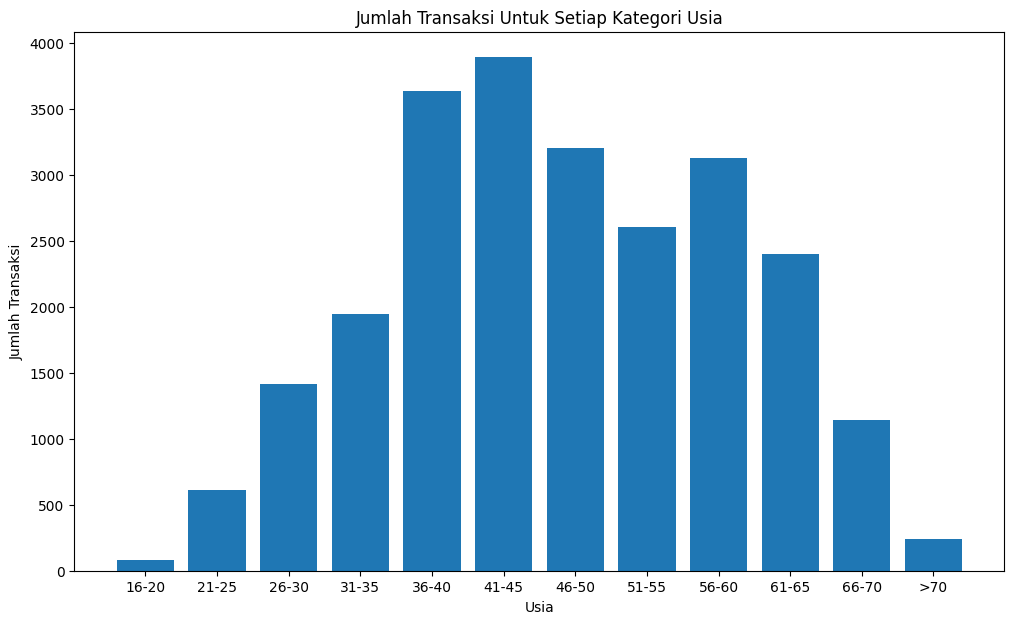

In [355]:
plt.figure(figsize=(12,7))
plt.bar(age_count['Range_of_Age'], age_count['Purchases_Quantity'])
plt.title('Jumlah Transaksi Untuk Setiap Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Transaksi')
plt.savefig('Jumlah Transaksi Untuk Setiap Kategori Usia.png')
plt.show()

**Insight - informasi :**
- Untuk jumlah transaksi, kategori usia 36-45 tahun memiliki porsi jumlah transaksi tertinggi, sedangkan kategori usia <25 tahun dan >70 tahun memiliki porsi jumlah transaksi terendah. 
- Hal ini didukung oleh data yaitu kategori usia 36-45 tahun memiliki porsi jumlah pelanggan yang tinggi, sedangkan kategori usia <25 tahun dan >70 tahun memiliki porsi jumlah pelanggan yang rendah.

### 4.9. Business Question 9 : Berapa usia customer yang memiliki nilai transaksi (total amount spent) tertinggi dan terendah dalam 2 tahun terakhir?

In [356]:
df.groupby(['Range_of_Age'])[['Purchases_Amount']].sum().sort_values('Purchases_Amount', ascending = False)

,Purchases_Amount
Range_of_Age,
41-45,175919
36-40,152714
56-60,150675
46-50,146773
51-55,125989
61-65,109407
31-35,90770
26-30,65717
66-70,63538


In [357]:
age_amount = df[['Range_of_Age', 'Purchases_Amount']].groupby('Range_of_Age', as_index=False).sum()
age_amount

,Range_of_Age,Purchases_Amount
0,16-20,3921
1,21-25,39105
2,26-30,65717
3,31-35,90770
4,36-40,152714
5,41-45,175919
6,46-50,146773
7,51-55,125989
8,56-60,150675
9,61-65,109407


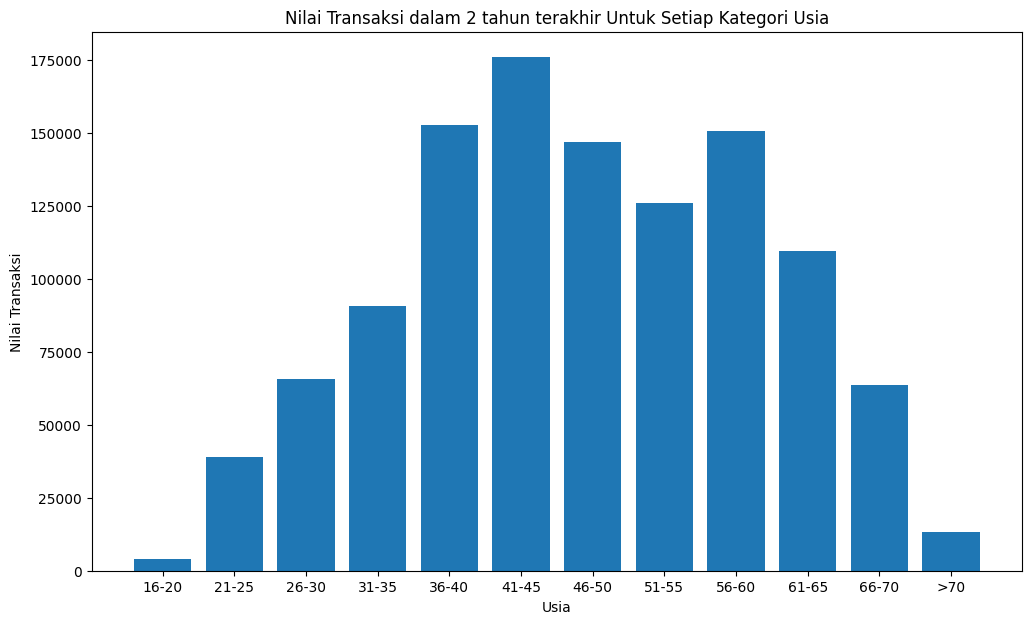

In [358]:
plt.figure(figsize=(12,7))
plt.bar(age_amount['Range_of_Age'], age_amount['Purchases_Amount'])
plt.title('Nilai Transaksi dalam 2 tahun terakhir Untuk Setiap Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Nilai Transaksi')
plt.savefig('Nilai Transaksi dalam 2 tahun terakhir Untuk Setiap Kategori Usia.png')
plt.show()

**Insight - informasi :**
- Untuk nilai transaksi dalam 2 tahun terakhir, kategori usia 36-50 dan 56-60 tahun memiliki porsi nilai transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi nilai transaksi terendah. 
- Hal ini didukung oleh data yaitu kategori usia 36-50 dan 56-60 tahun memiliki porsi jumlah pelanggan yang tinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah pelanggan yang rendah.

### 4.10. Business Question 10 : Untuk masing-masing produk, berapa usia customer yang memiliki nilai transaksi tertinggi dan terendah dalam 2 tahun terakhir?

Tabel di bawah ini menunjukkan total nilai transaksi dari penjualan wine, frutis, meat, fish, sweets dan gold dalam 2 tahun terakhir untuk setiap kategori usia  

In [359]:
age_product = df[['Range_of_Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].groupby('Range_of_Age', as_index=False).sum()
age_product

,Range_of_Age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,16-20,1420,115,1620,268,293,205
1,21-25,15723,1999,13937,2671,1661,3114
2,26-30,27533,3470,21488,4672,3609,4945
3,31-35,39944,4871,26713,6755,4841,7646
4,36-40,74047,7261,39456,11149,7968,12833
5,41-45,87214,7677,48979,10755,8377,12917
6,46-50,76216,6406,38954,8231,6194,10772
7,51-55,68607,5475,30980,7449,4960,8518
8,56-60,76447,6674,40536,9719,6788,10511
9,61-65,57118,3982,27721,6915,4668,9003


#### 4.10.1. Nilai transaksi (total amount spent) untuk Produk Wines

In [360]:
pd.crosstab(index=df['Range_of_Age'], values=df['MntWines'], aggfunc='sum', columns='Nilai Transaksi Produk Wine dalam 2 tahun terakhir')

col_0,Nilai Transaksi Produk Wine dalam 2 tahun terakhir
Range_of_Age,
16-20,1420
21-25,15723
26-30,27533
31-35,39944
36-40,74047
41-45,87214
46-50,76216
51-55,68607
56-60,76447


In [361]:
df.groupby(['Range_of_Age'])[['MntWines']].sum().sort_values('MntWines', ascending = False)

,MntWines
Range_of_Age,
41-45,87214
56-60,76447
46-50,76216
36-40,74047
51-55,68607
61-65,57118
31-35,39944
66-70,32435
26-30,27533


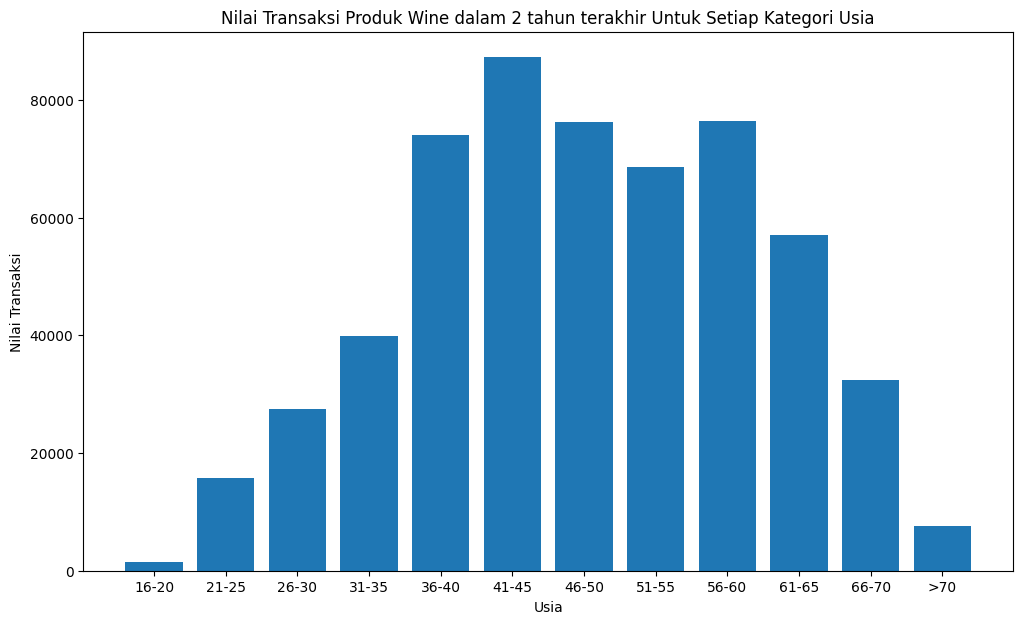

In [362]:
plt.figure(figsize=(12,7))
plt.bar(age_product['Range_of_Age'], age_product['MntWines'])
plt.title('Nilai Transaksi Produk Wine dalam 2 tahun terakhir Untuk Setiap Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Nilai Transaksi')
plt.savefig('Nilai Transaksi Produk Wine dalam 2 tahun terakhir Untuk Setiap Kategori Usia.png')
plt.show()

**Insight - informasi :**
- Untuk nilai transaksi produk WINE dalam 2 tahun terakhir, kategori usia 36-60 tahun memiliki porsi nilai transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi nilai transaksi terendah. 
- Hal ini didukung oleh data yaitu kategori usia 36-60 tahun memiliki porsi jumlah pelanggan yang tinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah pelanggan yang rendah.

#### 4.10.2. Nilai transaksi (total amount spent) untuk Produk Fruits

In [363]:
pd.crosstab(index=df['Range_of_Age'], values=df['MntFruits'], aggfunc='sum', columns='Nilai Transaksi Produk Fruits dalam 2 tahun terakhir')

col_0,Nilai Transaksi Produk Fruits dalam 2 tahun terakhir
Range_of_Age,
16-20,115
21-25,1999
26-30,3470
31-35,4871
36-40,7261
41-45,7677
46-50,6406
51-55,5475
56-60,6674


In [364]:
df.groupby(['Range_of_Age'])[['MntFruits']].sum().sort_values('MntFruits', ascending = False)

,MntFruits
Range_of_Age,
41-45,7677
36-40,7261
56-60,6674
46-50,6406
51-55,5475
31-35,4871
61-65,3982
26-30,3470
66-70,2556


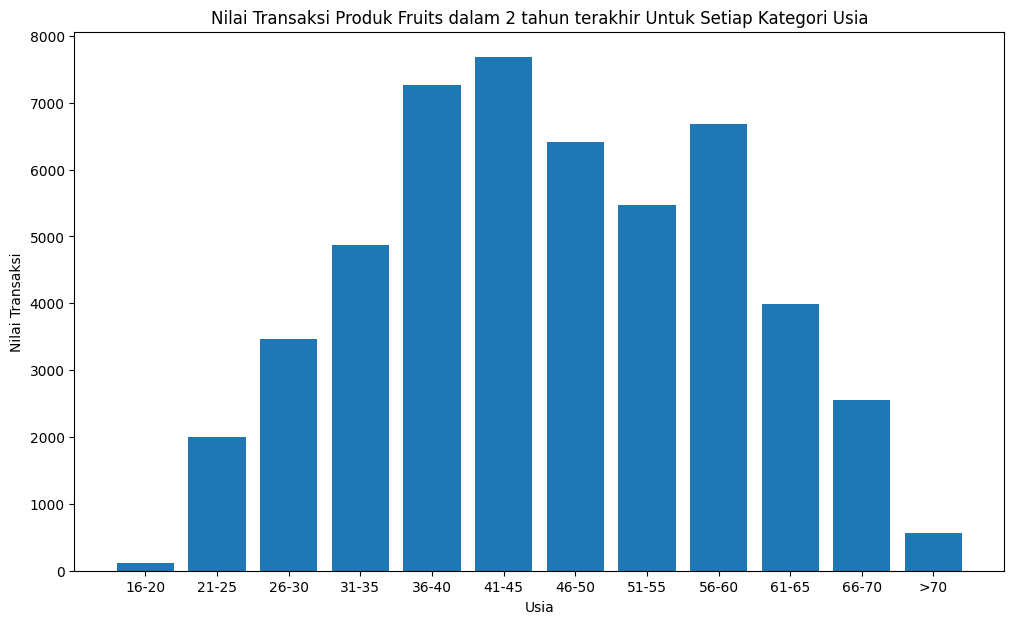

In [365]:
plt.figure(figsize=(12,7))
plt.bar(age_product['Range_of_Age'], age_product['MntFruits'])
plt.title('Nilai Transaksi Produk Fruits dalam 2 tahun terakhir Untuk Setiap Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Nilai Transaksi')
plt.savefig('Nilai Transaksi Produk Fruits dalam 2 tahun terakhir Untuk Setiap Kategori Usia.png')
plt.show()

**Insight - informasi :**
- Untuk nilai transaksi produk FRUITS dalam 2 tahun terakhir, kategori usia 36-50 dan 56-60 tahun memiliki porsi nilai transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi nilai transaksi terendah. 
- Hal ini didukung oleh data yaitu kategori usia 36-50 dan 56-60 tahun memiliki porsi jumlah pelanggan yang tinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah pelanggan yang rendah.

#### 4.10.3. Nilai transaksi (total amount spent) untuk Produk Meat

In [366]:
pd.crosstab(index=df['Range_of_Age'], values=df['MntMeatProducts'], aggfunc='sum', columns='Nilai Transaksi Produk Meat dalam 2 tahun terakhir')

col_0,Nilai Transaksi Produk Meat dalam 2 tahun terakhir
Range_of_Age,
16-20,1620
21-25,13937
26-30,21488
31-35,26713
36-40,39456
41-45,48979
46-50,38954
51-55,30980
56-60,40536


In [367]:
df.groupby(['Range_of_Age'])[['MntMeatProducts']].sum().sort_values('MntMeatProducts', ascending = False)

,MntMeatProducts
Range_of_Age,
41-45,48979
56-60,40536
36-40,39456
46-50,38954
51-55,30980
61-65,27721
31-35,26713
26-30,21488
66-70,18407


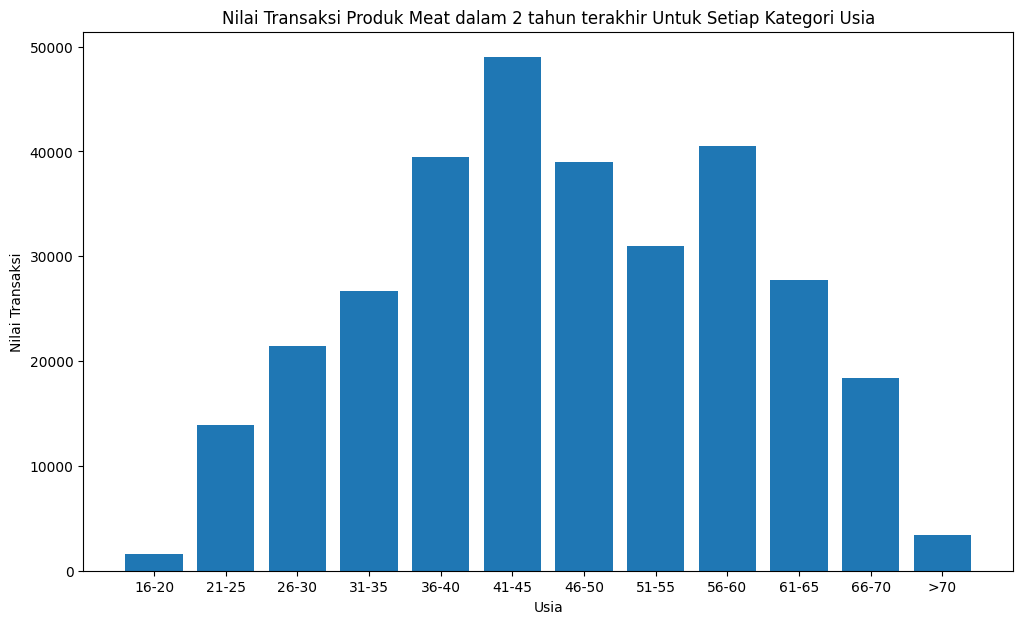

In [368]:
plt.figure(figsize=(12,7))
plt.bar(age_product['Range_of_Age'], age_product['MntMeatProducts'])
plt.title('Nilai Transaksi Produk Meat dalam 2 tahun terakhir Untuk Setiap Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Nilai Transaksi')
plt.savefig('Nilai Transaksi Produk Meat dalam 2 tahun terakhir Untuk Setiap Kategori Usia.png')
plt.show()

**Insight - informasi :**
- Untuk nilai transaksi produk MEAT dalam 2 tahun terakhir, kategori usia 36-50 dan 56-60 tahun memiliki porsi nilai transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi nilai transaksi terendah. 
- Hal ini didukung oleh data yaitu kategori usia 36-50 dan 56-60 tahun memiliki porsi jumlah pelanggan yang tinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah pelanggan yang rendah.

#### 4.10.4. Nilai transaksi (total amount spent) untuk Produk Fish

In [369]:
pd.crosstab(index=df['Range_of_Age'], values=df['MntFishProducts'], aggfunc='sum', columns='Nilai Transaksi Produk Fish dalam 2 tahun terakhir')

col_0,Nilai Transaksi Produk Fish dalam 2 tahun terakhir
Range_of_Age,
16-20,268
21-25,2671
26-30,4672
31-35,6755
36-40,11149
41-45,10755
46-50,8231
51-55,7449
56-60,9719


In [370]:
df.groupby(['Range_of_Age'])[['MntFishProducts']].sum().sort_values('MntFishProducts', ascending = False)

,MntFishProducts
Range_of_Age,
36-40,11149
41-45,10755
56-60,9719
46-50,8231
51-55,7449
61-65,6915
31-35,6755
26-30,4672
66-70,3603


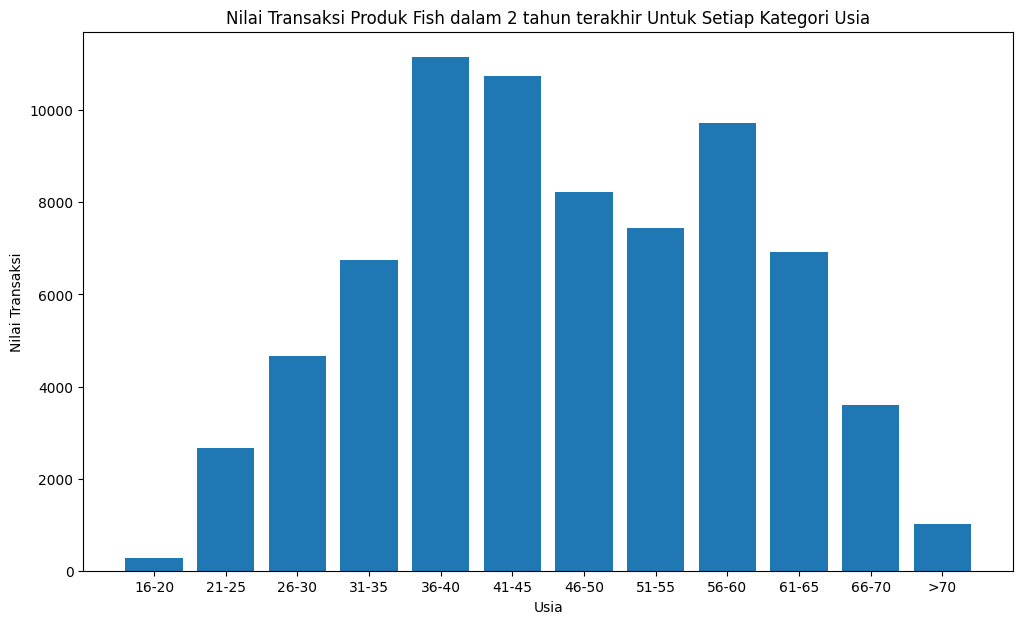

In [371]:
plt.figure(figsize=(12,7))
plt.bar(age_product['Range_of_Age'], age_product['MntFishProducts'])
plt.title('Nilai Transaksi Produk Fish dalam 2 tahun terakhir Untuk Setiap Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Nilai Transaksi')
plt.savefig('Nilai Transaksi Produk Fish dalam 2 tahun terakhir Untuk Setiap Kategori Usia.png')
plt.show()

**Insight - informasi :**
- Untuk nilai transaksi produk FISH dalam 2 tahun terakhir, kategori usia 36-45 dan 56-60 tahun memiliki porsi nilai transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi nilai transaksi terendah. 
- Hal ini didukung oleh data yaitu kategori usia 36-45 dan 56-60 tahun memiliki porsi jumlah pelanggan yang tinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah pelanggan yang rendah.

#### 4.10.5. Nilai transaksi (total amount spent) untuk Produk Sweets

In [372]:
pd.crosstab(index=df['Range_of_Age'], values=df['MntSweetProducts'], aggfunc='sum', columns='Nilai Transaksi Produk Sweet dalam 2 tahun terakhir')

col_0,Nilai Transaksi Produk Sweet dalam 2 tahun terakhir
Range_of_Age,
16-20,293
21-25,1661
26-30,3609
31-35,4841
36-40,7968
41-45,8377
46-50,6194
51-55,4960
56-60,6788


In [373]:
df.groupby(['Range_of_Age'])[['MntSweetProducts']].sum().sort_values('MntSweetProducts', ascending = False)

,MntSweetProducts
Range_of_Age,
41-45,8377
36-40,7968
56-60,6788
46-50,6194
51-55,4960
31-35,4841
61-65,4668
26-30,3609
66-70,2788


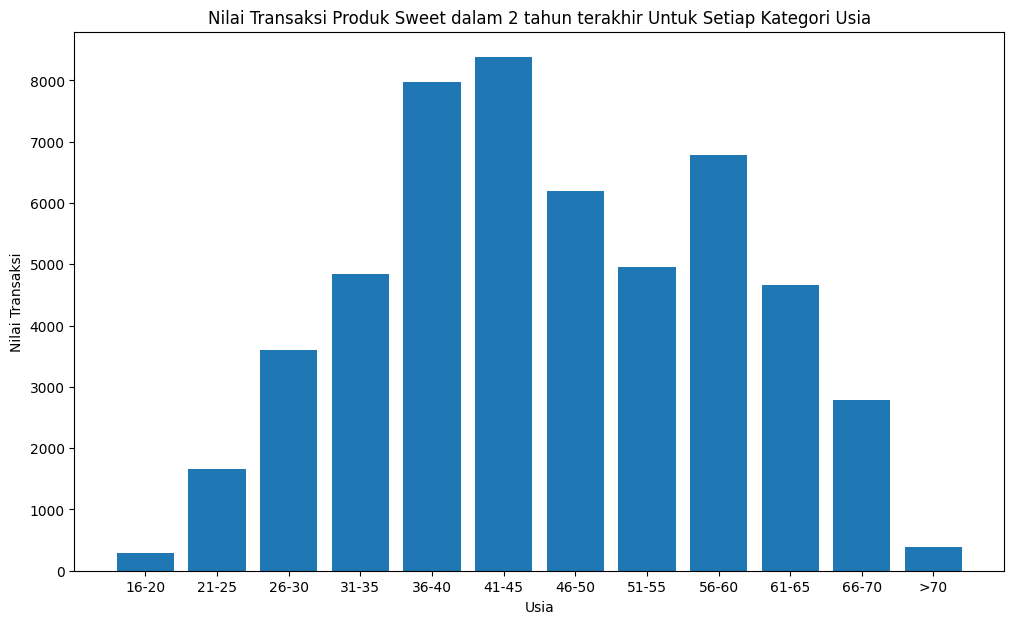

In [374]:
plt.figure(figsize=(12,7))
plt.bar(age_product['Range_of_Age'], age_product['MntSweetProducts'])
plt.title('Nilai Transaksi Produk Sweet dalam 2 tahun terakhir Untuk Setiap Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Nilai Transaksi')
plt.savefig('Nilai Transaksi Produk Sweet dalam 2 tahun terakhir Untuk Setiap Kategori Usia.png')
plt.show()

**Insight - informasi :**
- Untuk nilai transaksi produk SWEET dalam 2 tahun terakhir, kategori usia 36-50 dan 56-60 tahun memiliki porsi nilai transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi nilai transaksi terendah. 
- Hal ini didukung oleh data yaitu kategori usia 36-50 dan 56-60 tahun memiliki porsi jumlah pelanggan yang tinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah pelanggan yang rendah.

#### 4.10.6. Nilai transaksi (total amount spent) untuk Produk Gold

In [375]:
pd.crosstab(index=df['Range_of_Age'], values=df['MntGoldProds'], aggfunc='sum', columns='Nilai Transaksi Produk Gold dalam 2 tahun terakhir')

col_0,Nilai Transaksi Produk Gold dalam 2 tahun terakhir
Range_of_Age,
16-20,205
21-25,3114
26-30,4945
31-35,7646
36-40,12833
41-45,12917
46-50,10772
51-55,8518
56-60,10511


In [376]:
df.groupby(['Range_of_Age'])[['MntGoldProds']].sum().sort_values('MntGoldProds', ascending = False)

,MntGoldProds
Range_of_Age,
41-45,12917
36-40,12833
46-50,10772
56-60,10511
61-65,9003
51-55,8518
31-35,7646
26-30,4945
66-70,3749


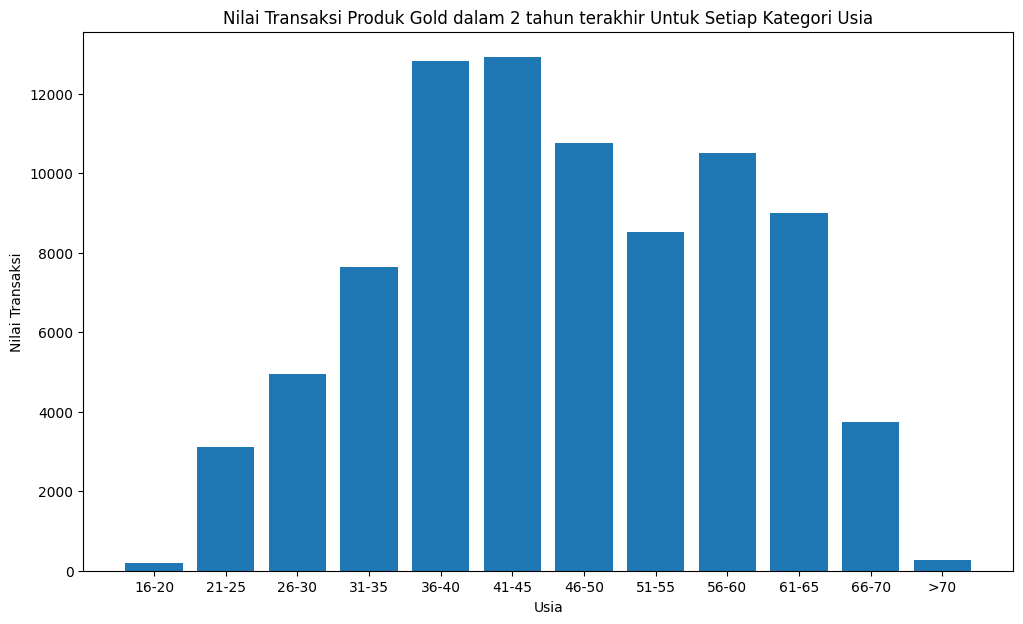

In [377]:
plt.figure(figsize=(12,7))
plt.bar(age_product['Range_of_Age'], age_product['MntGoldProds'])
plt.title('Nilai Transaksi Produk Gold dalam 2 tahun terakhir Untuk Setiap Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Nilai Transaksi')
plt.savefig('Nilai Transaksi Produk Gold dalam 2 tahun terakhir Untuk Setiap Kategori Usia.png')
plt.show()

**Insight - informasi :**
- Untuk nilai transaksi produk GOLD dalam 2 tahun terakhir, kategori usia 36-50 dan 56-60 tahun memiliki porsi nilai transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi nilai transaksi terendah. 
- Hal ini didukung oleh data yaitu kategori usia 36-50 dan 56-60 tahun memiliki porsi jumlah pelanggan yang tinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah pelanggan yang rendah.

### 4.11. Business Question 11 : Untuk masing-masing lokasi transaksi, berapa usia customer yang memiliki total pembelian tertinggi dan terendah

Tabel di bawah ini menunjukkan total pembelian dari setiap lokasi transaksi (website, katalaog dan offline) untuk setiap kategori usia  

In [378]:
age_place = df[['Range_of_Age', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].groupby('Range_of_Age', as_index=False).sum()
age_place

,Range_of_Age,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,16-20,17,25,39
1,21-25,175,166,267
2,26-30,421,269,726
3,31-35,667,358,919
4,36-40,1206,686,1746
5,41-45,1326,738,1826
6,46-50,1101,601,1502
7,51-55,811,579,1213
8,56-60,1031,672,1425
9,61-65,805,502,1095


#### 4.11.1. Transaksi Online melalui website supermarket

In [379]:
pd.crosstab(index=df['Range_of_Age'], values=df['NumWebPurchases'], aggfunc='sum', columns='Jumlah Transaksi Online melalui website supermarket')

col_0,Jumlah Transaksi Online melalui website supermarket
Range_of_Age,
16-20,17
21-25,175
26-30,421
31-35,667
36-40,1206
41-45,1326
46-50,1101
51-55,811
56-60,1031


In [380]:
df.groupby(['Range_of_Age'])[['NumWebPurchases']].sum().sort_values('NumWebPurchases', ascending = False)

,NumWebPurchases
Range_of_Age,
41-45,1326
36-40,1206
46-50,1101
56-60,1031
51-55,811
61-65,805
31-35,667
26-30,421
66-70,344


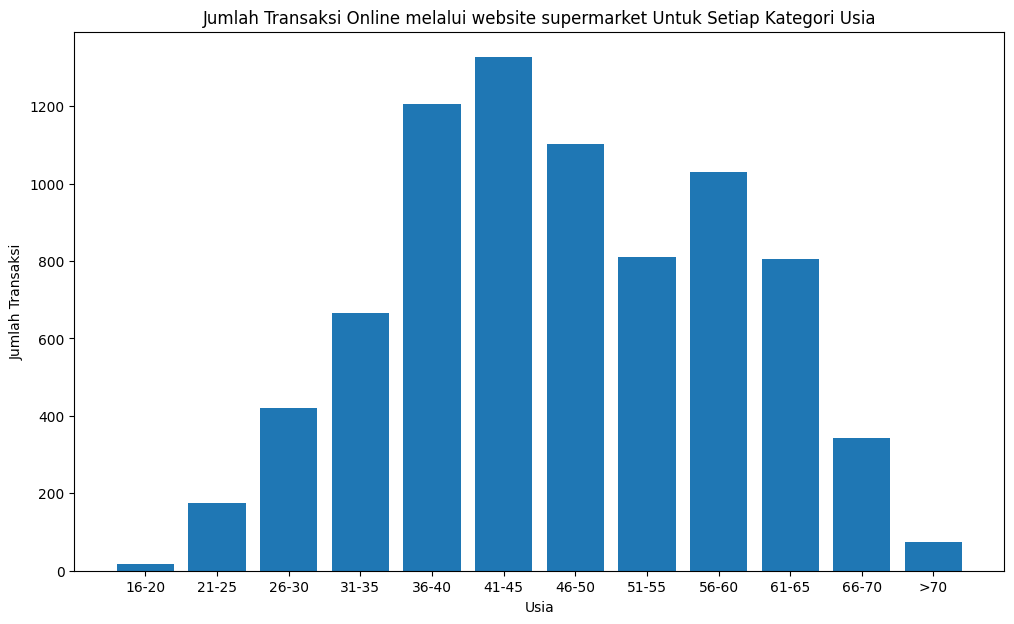

In [381]:
plt.figure(figsize=(12,7))
plt.bar(age_place['Range_of_Age'], age_place['NumWebPurchases'])
plt.title('Jumlah Transaksi Online melalui website supermarket Untuk Setiap Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Transaksi')
plt.savefig('Jumlah Transaksi Online melalui website supermarket Untuk Setiap Kategori Usia.png')
plt.show()

**Insight - informasi :**
- Untuk jumlah transaksi online melalui website supermarket, kategori usia 36-50 dan 56-60 tahun memiliki porsi jumlah transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah transaksi terendah. 
- Hal ini didukung oleh data yaitu kategori usia 36-50 dan 56-60 tahun memiliki porsi jumlah pelanggan yang tinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah pelanggan yang rendah.

#### 4.11.2. Transaksi menggunakan katalog

In [382]:
pd.crosstab(index=df['Range_of_Age'], values=df['NumCatalogPurchases'], aggfunc='sum', columns='Jumlah Transaksi menggunakan katalog')

col_0,Jumlah Transaksi menggunakan katalog
Range_of_Age,
16-20,25
21-25,166
26-30,269
31-35,358
36-40,686
41-45,738
46-50,601
51-55,579
56-60,672


In [383]:
df.groupby(['Range_of_Age'])[['NumCatalogPurchases']].sum().sort_values('NumCatalogPurchases', ascending = False)

,NumCatalogPurchases
Range_of_Age,
41-45,738
36-40,686
56-60,672
46-50,601
51-55,579
61-65,502
31-35,358
66-70,280
26-30,269


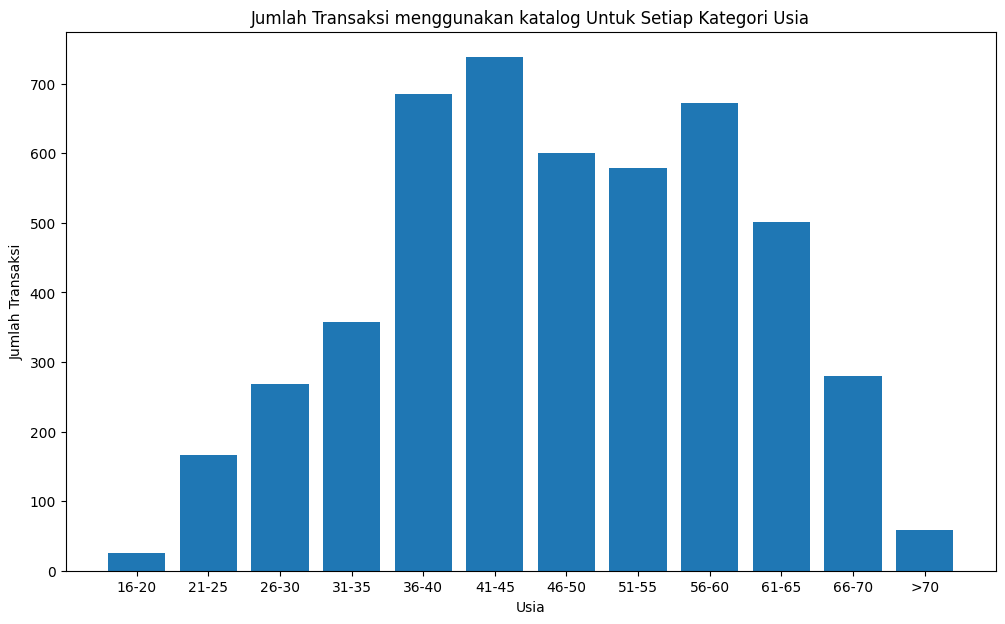

In [384]:
plt.figure(figsize=(12,7))
plt.bar(age_place['Range_of_Age'], age_place['NumCatalogPurchases'])
plt.title('Jumlah Transaksi menggunakan katalog Untuk Setiap Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Transaksi')
plt.savefig('Jumlah Transaksi menggunakan katalog Untuk Setiap Kategori Usia.png')
plt.show()

**Insight - informasi :**
- Untuk jumlah transaksi menggunakan katalog, kategori usia 36-45 dan 56-60 tahun memiliki porsi jumlah transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah transaksi terendah. 
- Hal ini didukung oleh data yaitu kategori usia 36-45 dan 56-60 tahun memiliki porsi jumlah pelanggan yang tinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah pelanggan yang rendah.

#### 4.11.3. Transaksi offline (langsung di supermarket) 

In [385]:
pd.crosstab(index=df['Range_of_Age'], values=df['NumCatalogPurchases'], aggfunc='sum', columns='Jumlah Transaksi offline (langsung di supermarket)')

col_0,Jumlah Transaksi offline (langsung di supermarket)
Range_of_Age,
16-20,25
21-25,166
26-30,269
31-35,358
36-40,686
41-45,738
46-50,601
51-55,579
56-60,672


In [386]:
df.groupby(['Range_of_Age'])[['NumStorePurchases']].sum().sort_values('NumStorePurchases', ascending = False)

,NumStorePurchases
Range_of_Age,
41-45,1826
36-40,1746
46-50,1502
56-60,1425
51-55,1213
61-65,1095
31-35,919
26-30,726
66-70,515


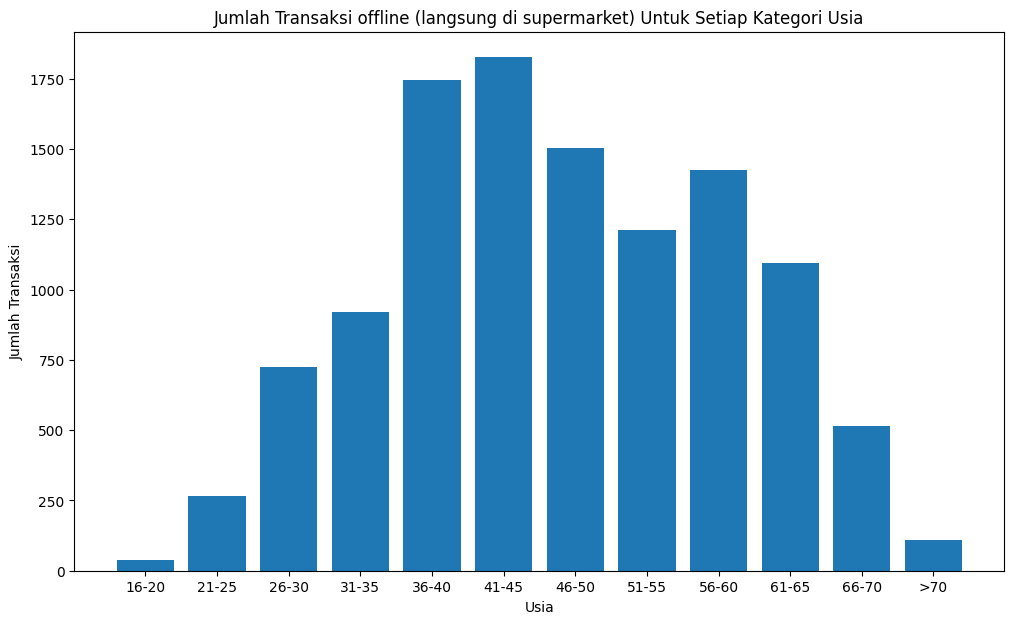

In [387]:
plt.figure(figsize=(12,7))
plt.bar(age_place['Range_of_Age'], age_place['NumStorePurchases'])
plt.title('Jumlah Transaksi offline (langsung di supermarket) Untuk Setiap Kategori Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Transaksi')
plt.savefig('Jumlah Transaksi offline (langsung di supermarket) Untuk Setiap Kategori Usia.png')
plt.show()

**Insight - informasi :**
- Untuk jumlah transaksi offline (langsung di supermarket), kategori usia 36-50 dan 56-60 tahun memiliki porsi jumlah transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah transaksi terendah.
- Hal ini didukung oleh data yaitu kategori usia 36-50 dan 56-60 tahun memiliki porsi jumlah pelanggan yang tinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi jumlah pelanggan yang rendah.

### 4.12. Business Question 12 : Untuk kategori pendidikan dan status pernikahan,  berapa distribusi nilai transaksi untuk semua produk?

In [388]:
pd.crosstab(index=df['Education'], columns=df['Marital_Status'], margins=True, margins_name = 'Total Pelanggan')

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,Total Pelanggan
Education,,,,,,,,,
2n Cycle,0,0,21,70,35,52,5,0,183
Basic,0,0,1,18,18,11,1,0,49
Graduation,1,1,112,383,221,247,29,0,994
Master,1,1,32,128,66,90,10,0,328
PhD,0,1,46,165,85,99,21,2,419
Total Pelanggan,2,3,212,764,425,499,66,2,1973


In [389]:
(pd.crosstab(index=df['Education'], columns=df['Marital_Status'], margins=True, normalize='index') * 100).round(2)

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0.0,0.00,11.48,38.25,19.13,28.42,2.73,0.00
Basic,0.0,0.00,2.04,36.73,36.73,22.45,2.04,0.00
Graduation,0.1,0.10,11.27,38.53,22.23,24.85,2.92,0.00
Master,0.3,0.30,9.76,39.02,20.12,27.44,3.05,0.00
PhD,0.0,0.24,10.98,39.38,20.29,23.63,5.01,0.48
All,0.1,0.15,10.75,38.72,21.54,25.29,3.35,0.10


In [390]:
(pd.crosstab(index=df['Education'], columns=df['Marital_Status'], margins=True, normalize='columns') * 100).round(2)

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,All
Education,,,,,,,,,
2n Cycle,0.0,0.00,9.91,9.16,8.24,10.42,7.58,0.0,9.28
Basic,0.0,0.00,0.47,2.36,4.24,2.20,1.52,0.0,2.48
Graduation,50.0,33.33,52.83,50.13,52.00,49.50,43.94,0.0,50.38
Master,50.0,33.33,15.09,16.75,15.53,18.04,15.15,0.0,16.62
PhD,0.0,33.33,21.70,21.60,20.00,19.84,31.82,100.0,21.24


In [391]:
pd.crosstab(index=df['Marital_Status'], columns=df['Education'], margins=True, margins_name = 'Total Pelanggan')

Education,2n Cycle,Basic,Graduation,Master,PhD,Total Pelanggan
Marital_Status,,,,,,
Absurd,0,0,1,1,0,2
Alone,0,0,1,1,1,3
Divorced,21,1,112,32,46,212
Married,70,18,383,128,165,764
Single,35,18,221,66,85,425
Together,52,11,247,90,99,499
Widow,5,1,29,10,21,66
YOLO,0,0,0,0,2,2
Total Pelanggan,183,49,994,328,419,1973


In [392]:
(pd.crosstab(index=df['Marital_Status'], columns=df['Education'], margins=True, normalize='index') * 100).round(2)

Education,2n Cycle,Basic,Graduation,Master,PhD
Marital_Status,,,,,
Absurd,0.00,0.00,50.00,50.00,0.00
Alone,0.00,0.00,33.33,33.33,33.33
Divorced,9.91,0.47,52.83,15.09,21.70
Married,9.16,2.36,50.13,16.75,21.60
Single,8.24,4.24,52.00,15.53,20.00
Together,10.42,2.20,49.50,18.04,19.84
Widow,7.58,1.52,43.94,15.15,31.82
YOLO,0.00,0.00,0.00,0.00,100.00
All,9.28,2.48,50.38,16.62,21.24


In [393]:
(pd.crosstab(index=df['Marital_Status'], columns=df['Education'], margins=True, normalize='columns') * 100).round(2)

Education,2n Cycle,Basic,Graduation,Master,PhD,All
Marital_Status,,,,,,
Absurd,0.00,0.00,0.10,0.30,0.00,0.10
Alone,0.00,0.00,0.10,0.30,0.24,0.15
Divorced,11.48,2.04,11.27,9.76,10.98,10.75
Married,38.25,36.73,38.53,39.02,39.38,38.72
Single,19.13,36.73,22.23,20.12,20.29,21.54
Together,28.42,22.45,24.85,27.44,23.63,25.29
Widow,2.73,2.04,2.92,3.05,5.01,3.35
YOLO,0.00,0.00,0.00,0.00,0.48,0.10


In [394]:
df.groupby(['Education', 'Marital_Status'])[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().round(1)

MntWines  MntFruits  MntMeatProducts  \
Education  Marital_Status                                         
2n Cycle   Divorced            8060        579             3448   
           Married            10906       1889             8441   
           Single              7755       1151             6550   
           Together            9916       1468             5542   
           Widow               1109        278              921   
Basic      Divorced               0          1                3   
           Married              299        288              328   
           Single                56        165              137   
           Together              24         92               87   
           Widow                  3          3               24   
Graduation Absurd               471        102              125   
           Alone                  5          7               24   
           Divorced           31845       3614            17872   
           Married           100446      11173            64067   
           Single             56984       7212            40316   
           Together           70679       7471            44360   
           Widow               8329        837             5544   
Master     Absurd               240         67              500   
           Alone                534          5               47   
           Divorced            9376        652             4747   
           Married            40772       2401            16505   
           Single             23701       1439            14476   
           Together           26926       2102            13616   
           Widow               3375        288             2169   
PhD        Alone                 15          0                8   
           Divorced           17169        942             6043   
           Married            62188       3358            25148   
           Single             28503       1497            12705   
           Together           34154       1417            14863   
           Widow               9803        545             3444   
           YOLO                 644          6              100   

                           MntFishProducts  MntSweetProducts  MntGoldProds  
Education  Marital_Status                                                   
2n Cycle   Divorced                    746               926          1115  
           Married                    2802              2047          3209  
           Single                     1454              1191          1803  
           Together                   3013              1955          2241  
           Widow                       518               339           221  
Basic      Divorced                     10                 6             9  
           Married                     554               380           508  
           Single                      176               153           352  
           Together                     95                72           215  
           Widow                        34                 7            31  
Graduation Absurd                      212                61           245  
           Alone                        19                14            20  
           Divorced                   4028              3465          5388  
           Married                   16122             12092         18684  
           Single                    10221              6275         10903  
           Together                  11156              7514         12122  
           Widow                      1359              1316          1537  
Master     Absurd                      199                 0           163  
           Alone                         0                 5            41  
           Divorced                    978               549          1268  
           Married                    3287              2671          4582  
           Single                     2343  

In [395]:
df.groupby(['Marital_Status', 'Education'])[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median().round(1)

MntWines  MntFruits  MntMeatProducts  \
Marital_Status Education                                          
Absurd         Graduation     471.0      102.0            125.0   
               Master         240.0       67.0            500.0   
Alone          Graduation       5.0        7.0             24.0   
               Master         534.0        5.0             47.0   
               PhD             15.0        0.0              8.0   
Divorced       2n Cycle       302.0       25.0            109.0   
               Basic            0.0        1.0              3.0   
               Graduation     169.5        8.0             66.0   
               Master         118.5        6.5             72.5   
               PhD            238.0        6.0             69.0   
Married        2n Cycle        29.0       11.5             23.5   
               Basic            4.0        8.5             10.0   
               Graduation     179.0        9.0             69.0   
               Master         179.0        4.0             52.0   
               PhD            223.0        4.0             67.0   
Single         2n Cycle        88.0       22.0             57.0   
               Basic            2.0        7.5              5.5   
               Graduation     163.0       10.0             87.0   
               Master         176.5        9.0             68.5   
               PhD            182.0        3.0             50.0   
Together       2n Cycle        45.5       11.5             34.5   
               Basic            2.0        5.0              7.0   
               Graduation     186.0       11.0             73.0   
               Master         168.5        6.5             62.0   
               PhD            233.0        2.0             65.0   
Widow          2n Cycle       162.0       61.0            108.0   
               Basic            3.0        3.0             24.0   
               Graduation     245.0       12.0            125.0   
               Master         193.5       19.5             50.0   
               PhD            512.0        6.0             71.0   
YOLO           PhD            322.0        3.0             50.0   

                           MntFishProducts  MntSweetProducts  MntGoldProds  
Marital_Status Education                                                    
Absurd         Graduation            212.0              61.0         245.0  
               Master                199.0               0.0         163.0  
Alone          Graduation             19.0              14.0          20.0  
               Master                  0.0               5.0          41.0  
               PhD                     4.0               2.0          20.0  
Divorced       2n Cycle               13.0               8.0          27.0  
               Basic                  10.0               6.0           9.0  
               Graduation              9.0               9.5          27.0  
               Master                  7.5               9.0          16.0  
               PhD                    10.5               2.0          20.0  
Married        2n Cycle               16.0               8.0          22.5  
               Basic                  13.0               8.5          15.5  
               Graduation             13.0              12.0          28.0  
               Master                  6.0               4.0          18.5  
               PhD                     3.0               3.0          16.0  
Single         2n Cycle               24.0              15.0          32.0  
               Basic                   8.0               8.0          15.0  
               Graduation             16.0              12.0          33.0  
               Master                  7.5               6.5          18.0  
               PhD                     6.0               3.0          13.0  
Together       2n Cycle               20.0              12.0          28.0  
               Basic                   7.0  

**Insight - informasi :**
- Pelanggan dengan latar belakang pendidikan sarjana (graduation) dan hidup bersama (baik married maupun together), memiliki nilai transaksi tertinggi.
- Pelanggan dengan latar belakang pendidikan dasar (untuk status pernikahan apapun), memiliki nilai transaksi terendah.

## 5. Actionable Recommendation untuk setiap Goals 

### 5.1. Goal 1 : Customer Churn menurun

**Insight - informasi dari Point 4.1. :**
- Tabel 2 : jumlah customer lost (pelanggan tidak loyal) sebanyak 67.61% ==> Churn rate bulanan = 67.61% (>1%).
- Tabel 3 : pelanggan tidak loyal paling banyak berusia 36-45 tahun.
- Tabel 4 : median income antara pelanggan loyal dan pelanggan tidak loyal relatif sama.
- Tabel 5 : median nilai transaksi (amount spent) dalam 2 tahun terakhir antara pelanggan loyal dan pelanggan tidak loyal hanya berbeda sedikit.
- Tabel 6 : jumlah nilai transaksi (total amount spent) pelanggan tidak loyal dalam 2 tahun terakhir sekitar 2x lipat dari pelanggan loyal.
- Tabel 7 : jumlah transaksi pelanggan tidak loyal sekitar 2x lipat dari pelanggan loyal.

**Kondisi di atas menunjukkan bahwa supermarket mengalami kehilangan potensi keuntungan yang besar akibat hilangnya pelanggan.** 

**Actionable Recommendation :**
- Memberikan diskon yang hanya berlaku sampai 1 bulan setelah transaksi terakhir dilakukan. Hal ini akan mendorong pelanggan untuk menggunakan promo diskon tersebut sebelum masa berlakunya habis ==> pelanggan akan melakukan transaksi berikutnya dalam 1 bulan. 
- Supermarket merespon setiap complain dari pelanggan dengan cepat. "Respon yang lama" bisa menjadi faktor yang membuat terjadinya customer churn.
- Memberikan loyalti bonus secara berkala, seperti setiap 3 bulan, 6 bulan atau setiap tahun untuk memelihara loyalitas pelaggan. Bonus ini bisa berupa pemberian tambahan produk secara gratis kepada pelanggan. 

**Berikut ini perbandingan ketika supermarket berhasil melakukan Actionable Recommendation :**

**BEFORE**
- Di bulan terakhir, jumlah customer churn yaitu 1333 pelanggan ==> 67.66% dari jumlah seluruh pelanggan.
- Dalam 2 tahun terakhir, median dari nilai transaksi customer churn yaitu $358.
- Churn rate tahunan yang dapat diterima setiap tahunnya adalah 5-7% (atau churn rate bulanan <1%) ==> source : https://www.forbes.com/advisor/business/churn-rate/

**AFTER**
- Jika supermarket bisa mengurangi jumlah churn rate bulanan sampai 1% (19 pelanggan), maka supermarket akan mendapatkan tambahan nilai transaksi sebagai berikut:
    - Pengurangan chun rate = 67.66% - 1% = 66.66% (==> 1313 pelanggan)
    - 1313 pelanggan x $358 = $470.054 ==> tambahan nilai transaksi setiap bulannya.
    - Dalam 1 tahun ke depan, maka supermarket bisa mendapatkan tambahan nilai transaksi sebesar $5.640.648

**Berikut ini adalah tabel estimasi tambahan nilai transaksi untuk beberapa alternatif chun rate (selain 1%) yang bisa menjadi referensi bagi Board of Director :**
- Tabel ini juga bisa membantu penentuan alokasi budget diskon untuk melakukan actionable recommendation di atas, sehingga supermarket tetap mendapatkan profit meski memberikan diskon. 

In [396]:
data_chun = []
for i in range(10, 70, 10):
        data_chun.append([
            i,
            ((67.66 - i) * 1970) * 358 / 100,
            ((67.66 - i) * 1970) * 358 * 12 / 100
        ])

pd.DataFrame(data_chun, columns=[
    "Churn Rate (%)",
    "Tambahan nilai transaksi dalam 1 bulan ($)",
    "Tambahan nilai transaksi dalam 1 tahun ke depan ($)"
])

,Churn Rate (%),Tambahan nilai transaksi dalam 1 bulan ($),Tambahan nilai transaksi dalam 1 tahun ke depan ($)
0,10,406652.916,4879834.992
1,20,336126.916,4033522.992
2,30,265600.916,3187210.992
3,40,195074.916,2340898.992
4,50,124548.916,1494586.992
5,60,54022.916,648274.992


### 5.2. Goal 2 : Nilai transaksi meningkat

**A) Kampanye promosi :**

- Insight - informasi :
    - Point 4.2. : Jumlah transaksi dengan harga discount hanya 19.03% dari keseluruhan jumlah transaksi.
    - Point 4.3. : Transaksi paling banyak terjadi pada saat kampanye promosi terakhir (kampanye ke-6) yaitu 34.68% dari keseluruhan jumlah transaksi.
    - Point 4.12. : Pelanggan dengan pendidikan sarjana (graduation) dan hidup bersama (baik married maupun together), memiliki nilai transaksi tertinggi. Pelanggan dengan pendidikan dasar (untuk status pernikahan apapun), memiliki nilai transaksi terendah.

- Actionable Recommendation :
    - Mengoptimalkan program discount langsung di kampanye pertama, supaya lebih banyak pelanggan yang langsung membeli produk diskon tanpa menunggu tahapan kampanye berikutnya.
    - Memberi promo tambahan bagi pelanggan dengan latar belakang pendidikan dasar, supaya nilai transaksi mereka bisa meningkat.

**B) Jenis Produk :**

- Insight - informasi :
    - Point 4.4. : Dalam 2 tahun terakhir, produk WINE memiliki nilai transaksi tertinggi, sedangkan produk FRUITS memilki nilai transaksi terendah. 

- Actionable Recommendation :
    - Meningkatkan promos dan penawaran khusus bagi pelanggan yang membeli produk FRUITS, SWEET, FISH dan GOLD. Kampanye marketing ini bisa berupa paket pembelian bundling.
    - Menambah variasi sub-produk untuk masing-masing produk, sehingga pelanggan tidak perlu pergi ke supermarket kompetitor.

**C) Metode/lokasi transaksi :**

- Insight - informasi :
    - Point 4.5. : Transaksi paling banyak (46.85%) dilakukan secara offline langsung di supermarket.
    
- Actionable Recommendation :
    - Mengurangi biaya tambahan (seperti biaya admin, dll) yang terdapat di transaksi online melalui website supermarket. Biaya tambahan ini mungkin juga menjadi penyeban churn.

**D) Kategori usia pelanggan :**

- Insight - informasi :
    - Point 4.6. : Untuk kontribusi jumlah pelanggan, kategori usia 36-45 (33.55%) tahun memiliki porsi jumlah pelanggan tertinggi, sedangkan kategori usia <25 tahun dan >66 tahun memiliki porsi jumlah pelanggan terendah (4.77%). 
    - Point 4.7. : Untuk median income, kategori usia >66 tahun memiliki median income tertinggi, sedangkan kategori usia 26-30 tahun memiliki median income terendah. 
    - Point 4.8. : Untuk jumlah transaksi, kategori usia 36-45 tahun memiliki porsi jumlah transaksi tertinggi, sedangkan kategori usia <25 tahun dan >70 tahun memiliki porsi jumlah transaksi terendah. 
    - Point 4.9. : Untuk nilai transaksi dalam 2 tahun terakhir, kategori usia 36-50 dan 56-60 tahun memiliki porsi nilai transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi nilai transaksi terendah. 
    - Point 4.10.1. s/d 4.10.6. : Untuk nilai transaksi masing-masing produk dalam 2 tahun terakhir, kategori usia 36-50 dan 56-60 tahun memiliki porsi nilai transaksi tertinggi, sedangkan kategori usia <20 tahun dan >70 tahun memiliki porsi nilai transaksi terendah. Hal ini didukung oleh data yaitu mayoritas pelanggan (57.82%) berusia 36-50 dan 56-60 tahun. Sedangkan pelanggan berusia <20 tahun dan >70 tahun hanya 1% total pelanggan.
    - Point 4.11.1. s/d 4.11.3. : Untuk keseluruhan jumlah transaksi (baik secara online melalui website supermarket, menggunakan katalog, maupun transaksi offline langsung di supermarket), pelanggan berusia 36-50 dan 56-60 tahun memiliki porsi nilai transaksi tertinggi. Sedangkan pelanggan berusia <20 tahun dan >70 tahun memiliki porsi jumlah transaksi terendah. Hal ini didukung oleh data yaitu mayoritas pelanggan (57.82%) berusia 36-50 dan 56-60 tahun. Sedangkan pelanggan berusia <20 tahun dan > tahun hanya 1% total pelanggan.

- Actionable Recommendation :
    - Memberikan promo khusus kepada pelanggan dalam kategori usia berikut ini:
        - kategori usia 21-30 dan 66-70 : discount 5% + promo ulang tahun + point reward (yang dapat dikonversi menjadi discount tambahan)  
        - kategori usia 31-35, 51-55 dan 61-65 : discount 5% + promo ulang tahun